# **1. Perkenalan Dataset**


Dataset yang digunakan adalah IMDB Movie Dataset yang berisi informasi film seperti judul, tahun, genre, deskripsi, dan rating.

**Tujuan eksperimen:**
- Melakukan eksplorasi data
- Melakukan preprocessing data teks
- Menyiapkan dataset untuk model machine learning (text classification)

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber Kaggle yaitu berasal dari : https://www.kaggle.com/datasets/payamamanat/imbd-dataset


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv("../dataset_raw/IMBD.csv")
df.head()

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9430 non-null   object 
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   object 
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   description  9957 non-null   object 
 7   stars        9957 non-null   object 
 8   votes        8784 non-null   object 
dtypes: float64(1), object(8)
memory usage: 700.2+ KB


In [4]:
df.describe()

,rating
count,8784.000000
mean,6.764515
std,1.214840
min,1.700000
25%,6.100000
50%,6.900000
75%,7.600000
max,9.900000


In [5]:
df.shape

(9957, 9)

In [6]:
df.columns

Index(['title', 'year', 'certificate', 'duration', 'genre', 'rating',
       'description', 'stars', 'votes'],
      dtype='object')

In [7]:
df.isnull().sum()

title             0
year            527
certificate    3453
duration       2036
genre            73
rating         1173
description       0
stars             0
votes          1173
dtype: int64

In [8]:
(df.isnull().sum() / len(df)) * 100

title           0.000000
year            5.292759
certificate    34.679120
duration       20.447926
genre           0.733153
rating         11.780657
description     0.000000
stars           0.000000
votes          11.780657
dtype: float64

In [9]:
df["year"] = (
    df["year"]
    .astype(str)
    .str.extract(r"(\d{4})")  # ambil 4 digit pertama
    .astype(float)
)

df["year"] = df["year"].fillna(df["year"].median())


df["votes"] = (
    df["votes"]
    .astype(str)
    .str.replace(",", "", regex=False)
    .astype(float)
)

df["votes"] = df["votes"].fillna(df["votes"].median())

df["duration"] = (
    df["duration"]
    .astype(str)
    .str.extract(r"(\d+)")
    .astype(float)
)

df["duration"] = df["duration"].fillna(df["duration"].median())


In [10]:
# Drop baris yang tidak memiliki target atau teks
df = df.dropna(subset=["description", "rating"])

# Numerik → median
df["year"] = df["year"].fillna(df["year"].median())
df["votes"] = df["votes"].fillna(df["votes"].median())
df["duration"] = df["duration"].fillna(df["duration"].median())

# Kategorikal → Unknown
df["certificate"] = df["certificate"].fillna("Unknown")
df["genre"] = df["genre"].fillna("Unknown")

df.isnull().sum()


title          0
year           0
certificate    0
duration       0
genre          0
rating         0
description    0
stars          0
votes          0
dtype: int64

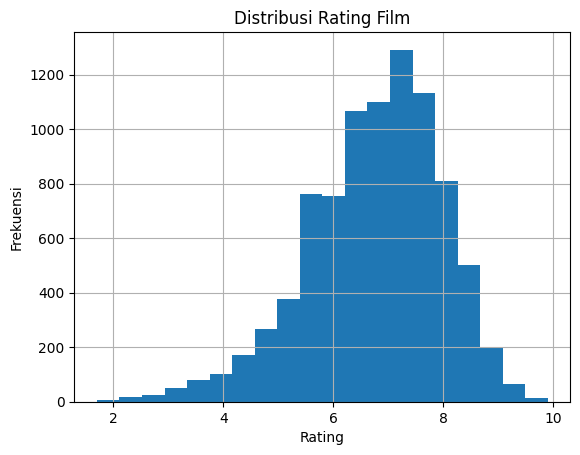

In [11]:
df["rating"].hist(bins=20)
plt.title("Distribusi Rating Film")
plt.xlabel("Rating")
plt.ylabel("Frekuensi")
plt.show()

In [12]:
df["genre"].value_counts().head(10)

genre
Comedy                          771
Animation, Action, Adventure    514
Drama                           481
Documentary                     461
Comedy, Drama                   274
Crime, Drama, Mystery           244
Drama, Romance                  231
Comedy, Drama, Romance          195
Reality-TV                      178
Action, Crime, Drama            165
Name: count, dtype: int64

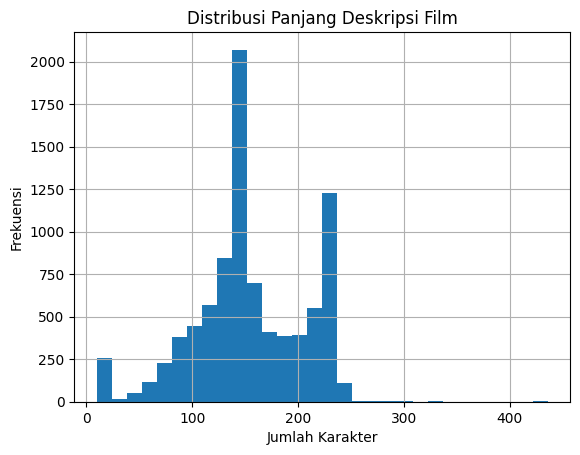

In [13]:
df["text_length"] = df["description"].astype(str).apply(len)

df["text_length"].hist(bins=30)
plt.title("Distribusi Panjang Deskripsi Film")
plt.xlabel("Jumlah Karakter")
plt.ylabel("Frekuensi")
plt.show()

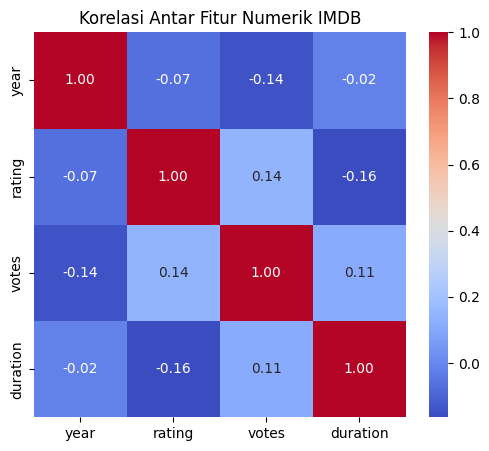

In [14]:
numeric_cols = ["year", "rating", "votes", "duration"]

corr_df = df[numeric_cols].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Fitur Numerik IMDB")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [15]:
df = df.dropna(subset=["description", "rating"])

In [16]:
def rating_to_label(r):
    if r < 6:
        return "low"
    elif r < 8:
        return "medium"
    else:
        return "high"

df["label"] = df["rating"].apply(rating_to_label)
df["label"].value_counts()


label
medium    5382
low       2043
high      1359
Name: count, dtype: int64

In [17]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["clean_text"] = df["description"].apply(clean_text)
df[["description", "clean_text"]].head()


,description,clean_text
0,Decades after their 1984 All Valley Karate Tou...,decades after their all valley karate tourname...
1,Follows the political rivalries and romance of...,follows the political rivalries and romance of...
2,The trials and tribulations of criminal lawyer...,the trials and tribulations of criminal lawyer...
3,When a psychiatrist shelters a mysterious cult...,when a psychiatrist shelters a mysterious cult...
4,A Street Kid trying to survive in a technology...,a street kid trying to survive in a technology...


In [18]:
processed_df = df[["clean_text", "label"]]
processed_df.head()

,clean_text,label
0,decades after their all valley karate tourname...,high
1,follows the political rivalries and romance of...,high
2,the trials and tribulations of criminal lawyer...,high
3,when a psychiatrist shelters a mysterious cult...,low
4,a street kid trying to survive in a technology...,high


In [20]:
processed_df.to_csv("dataset_preprocessing/imbd_preprocessed.csv", index=False)